In [1]:
# import pyspark
# from pyspark.sql import SparkSession
# from pyspark.sql.types import *
# from pyspark.sql import functions as F
# 
# 
# import org.apache.spark.sql.SparkSession
# 
# from pyspark.sql import SparkSession
# 
# spark = SparkSession \
#     .builder \
#     .appName("Python Spark SQL basic example") \
#     .config("spark.some.config.option", "some-value") \
#     .getOrCreate()
# 
# data = SparkSession(sparkContext).read.csv("data/data.csv", header=True, inferSchema=True)


In [2]:

# df = pd.read_hdf(infile)
# df.head()

In [3]:
# f = h5py.File(infile, 'r')
# 
# f.keys()

In [4]:
# hf = h5py.File(infile, 'r')
# n1 = np.array(hf["dataset_name"][:]) #dataset_name is same as hdf5 object name 
# 
# print(n1)

In [5]:
from ont_fast5_api.fast5_interface import get_fast5_file
import numpy as np
import h5py
import pandas as pd

infile_pass = '/Users/Tobias/Documents/Studium/Master_AI/Semester/Masterarbeit/Masterarbeit_Versuch_2/Code/Daten/MinION_sample_data/RawData/RKI/MinION_fast5/unpacked/220125_GI3_Run22-024/fast5_pass/barcode01/FAR92375_pass_barcode01_67dea784_0.fast5'
infile_fail = '/Users/Tobias/Documents/Studium/Master_AI/Semester/Masterarbeit/Masterarbeit_Versuch_2/Code/Daten/MinION_sample_data/RawData/RKI/MinION_fast5/unpacked/220125_GI3_Run22-024/fast5_pass/barcode01/FAR92375_pass_barcode01_67dea784_0.fast5'


def raw_data_to_numpy_array(readfile):
    data = []

    fast5_filepath = readfile # This can be a single- or multi-read file
    with get_fast5_file(fast5_filepath, mode="r") as f5:
        for read in f5.get_reads():
            raw_data = read.get_raw_data()
            tup = read.read_id, raw_data
            data.append(tup)

            # read.read_id, raw_data.shape

    return pd.DataFrame(data, columns=['read_id', 'raw_data'])

df = raw_data_to_numpy_array(infile_pass)



In [6]:
df

read_id  \
0     000566c6-6b51-4fb6-9e15-4e6a8642364f   
1     00773240-e66d-4ab7-91a7-96737e702515   
2     007be6a8-0376-4b11-809c-d63250350280   
3     008c1e6d-38a3-4d87-8a9b-ca2c3d3fa741   
4     008c5a10-702d-4427-80d5-842b09f6449d   
...                                    ...   
3995  ffa45428-0fc3-4b83-9de1-713c7c776527   
3996  ffbb5487-4ba8-4588-ac37-2068d088cc4b   
3997  ffc2ca49-61d7-480a-b928-407b0a84d3fe   
3998  ffe6c31f-420f-4d31-b07e-14aefd3d5c41   
3999  ffee0f1e-cc8a-434b-8bcc-8de7d094e98b   

                                               raw_data  
0     [639, 464, 495, 475, 456, 468, 458, 471, 469, ...  
1     [808, 464, 461, 466, 457, 451, 451, 492, 486, ...  
2     [745, 434, 437, 428, 429, 432, 433, 426, 427, ...  
3     [407, 380, 386, 390, 388, 380, 399, 406, 418, ...  
4     [512, 491, 465, 476, 484, 484, 463, 470, 509, ...  
...                                                 ...  
3995  [545, 461, 488, 476, 472, 470, 479, 477, 478, ...  
3996  [506, 491, 495, 501, 523, 520, 527, 530, 536, ...  
3997  [541, 515, 501, 510, 513, 462, 651, 714, 723, ...  
3998  [589, 402, 393, 406, 402, 399, 394, 403, 396, ...  
3999  [792, 477, 495, 406, 417, 454, 444, 451, 449, ...  

[4000 rows x 2 columns]

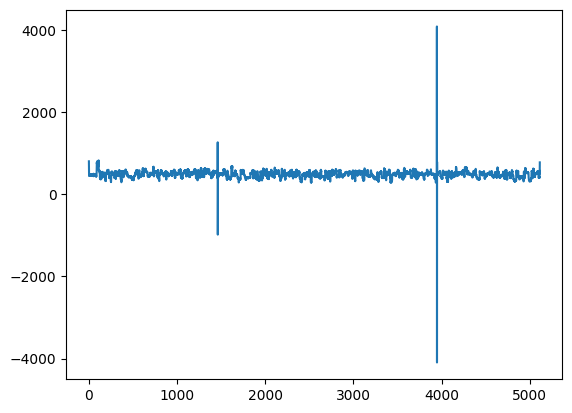

In [7]:
import matplotlib.pyplot as plt

plt.plot(df.raw_data[1])

In [8]:
iter = ["{0:02}".format(i) for i in range(100)]

In [9]:
import os

def get_paths(iter):
   source_dir = '/Users/Tobias/Documents/Studium/Master_AI/Semester/Masterarbeit/Masterarbeit_Versuch_2/Code/Daten/MinION_sample_data/RawData/RKI/MinION_fast5/unpacked//220125_GI3_Run22-024/'
   barcode_iter = 'barcode' + iter
   barcode_pass = os.path.join(source_dir, 'fast5_pass', barcode_iter)
   barcode_fail = os.path.join(source_dir, 'fast5_fail', barcode_iter)
   if os.path.exists(barcode_pass) and os.path.exists(barcode_fail):
      return [barcode_pass, barcode_fail]
   else:
      pass


def walk_through_files(path, file_extension='.fast5'):
   for (dirpath, dirnames, filenames) in os.walk(path):
      for filename in filenames:
         if filename.endswith(file_extension):
            yield os.path.join(dirpath, filename)


def combine_files(iterator):

   barcode_list = get_paths(iterator)
   barcode_parts = []
   for barcode in barcode_list:
      print(barcode)
      for fname in walk_through_files(barcode):
         barcode_part = raw_data_to_numpy_array(fname)
         barcode_parts.append(barcode_part)

   return pd.concat(barcode_parts)

for iterator in ["{0:02}".format(i) for i in range(1,100)]:
   print(iterator)
   df = combine_files(iterator)
   df.to_parquet('barcode' + iterator + '.parquet', engine='pyarrow', compression='snappy')




01
/Users/Tobias/Documents/Studium/Master_AI/Semester/Masterarbeit/Masterarbeit_Versuch_2/Code/Daten/MinION_sample_data/RawData/RKI/MinION_fast5/unpacked//220125_GI3_Run22-024/fast5_pass/barcode01
/Users/Tobias/Documents/Studium/Master_AI/Semester/Masterarbeit/Masterarbeit_Versuch_2/Code/Daten/MinION_sample_data/RawData/RKI/MinION_fast5/unpacked//220125_GI3_Run22-024/fast5_fail/barcode01
02
/Users/Tobias/Documents/Studium/Master_AI/Semester/Masterarbeit/Masterarbeit_Versuch_2/Code/Daten/MinION_sample_data/RawData/RKI/MinION_fast5/unpacked//220125_GI3_Run22-024/fast5_pass/barcode02
/Users/Tobias/Documents/Studium/Master_AI/Semester/Masterarbeit/Masterarbeit_Versuch_2/Code/Daten/MinION_sample_data/RawData/RKI/MinION_fast5/unpacked//220125_GI3_Run22-024/fast5_fail/barcode02
03
/Users/Tobias/Documents/Studium/Master_AI/Semester/Masterarbeit/Masterarbeit_Versuch_2/Code/Daten/MinION_sample_data/RawData/RKI/MinION_fast5/unpacked//220125_GI3_Run22-024/fast5_pass/barcode03


: 

: 

In [ ]:
barcode1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103900 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   read_id   103900 non-null  object
 1   raw_data  103900 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB


In [ ]:
# implement this: https://github.com/christophstach/covid-spings-explorative-analysis/blob/main/features.py

In [ ]:
#parquet compressed with snappy
#barcode1.to_parquet('barcode1.parquet', engine='pyarrow', compression='snappy')